In [1]:
from scipy.io.arff import loadarff
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (roc_curve, auc, accuracy_score,roc_auc_score)
from sklearn.preprocessing import StandardScaler

In [2]:
fp= 'TimeBasedFeatures-Dataset-15s-VPN.arff'
raw_data = loadarff(fp)

In [3]:
df=pd.DataFrame(raw_data[0])
df

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18753,73240.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,27.307482,...,0.000000,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN'
18754,52083.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,38.400246,...,0.000000,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN'
18755,67923.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,29.445107,...,0.000000,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN'
18756,313588.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,6.377795,...,0.000000,-1.0,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN'


In [4]:
df['class1'] = df['class1'].map(lambda val : 0 if val == b'Non-VPN' else 1)

In [5]:
print("For the Dataset:\n",df['class1'].value_counts(),"\n")

For the Dataset:
 1    9793
0    8965
Name: class1, dtype: int64 



In [6]:
print(list(df.columns))

['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']


In [7]:
le=LabelEncoder()
df['duration']=le.fit_transform(df.duration)
df['total_fiat']=le.fit_transform(df.total_fiat)
df['total_biat']=le.fit_transform(df.total_biat)
df['min_fiat']=le.fit_transform(df.min_fiat)
df['max_fiat']=le.fit_transform(df.max_fiat)
df['max_biat']=le.fit_transform(df.max_biat)
df['mean_fiat']=le.fit_transform(df.mean_fiat)
df['mean_biat']=le.fit_transform(df.mean_biat)
df['flowPktsPerSecond']=le.fit_transform(df.flowPktsPerSecond)
df['flowBytesPerSecond']=le.fit_transform(df.flowBytesPerSecond)
df['min_flowiat']=le.fit_transform(df.min_flowiat)
df['max_flowiat']=le.fit_transform(df.max_flowiat)
df['mean_flowiat']=le.fit_transform(df.mean_flowiat)
df['std_flowiat']=le.fit_transform(df.std_flowiat)
df['min_active']=le.fit_transform(df.min_active)
df['mean_active']=le.fit_transform(df.mean_active)
df['max_active']=le.fit_transform(df.max_active)
df['std_active']=le.fit_transform(df.std_active)
df['min_idle']=le.fit_transform(df.min_idle)
df['mean_idle']=le.fit_transform(df.mean_idle)
df['max_idle']=le.fit_transform(df.max_idle)
df['std_idle']=le.fit_transform(df.std_idle)

In [8]:
X=df.drop(columns=["class1"])
y=df["class1"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report)

In [10]:
print("Type: ", type(X_train))
print("Type: ", type(y_train))
print("X train shape: ",X_train.shape)
print("Y train shape: ",y_train.shape)
print("Y train values: ",np.unique(y_train))
print("Y test values: ",np.unique(y_test))

Type:  <class 'numpy.ndarray'>
Type:  <class 'pandas.core.series.Series'>
X train shape:  (15006, 23)
Y train shape:  (15006,)
Y train values:  [0 1]
Y test values:  [0 1]


In [11]:
metrics = [BinaryAccuracy() , Precision(), Recall(), ]
model = Sequential()
model.add(Dense(32,input_dim=23,activation="relu"))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [12]:
print(len(X_train[0]))

23


In [13]:
X_train = np.array(X_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,np.array(y_train),epochs =100)

Epoch 1/100
469/469 [==============================] - 1s 874us/step - loss: 0.6119 - binary_accuracy: 0.6633 - precision: 0.6648 - recall: 0.7121
Epoch 2/100
469/469 [==============================] - 0s 826us/step - loss: 0.5374 - binary_accuracy: 0.7194 - precision: 0.7418 - recall: 0.7068
Epoch 3/100
469/469 [==============================] - 0s 835us/step - loss: 0.5044 - binary_accuracy: 0.7404 - precision: 0.7574 - recall: 0.7371
Epoch 4/100
469/469 [==============================] - 0s 846us/step - loss: 0.4791 - binary_accuracy: 0.7553 - precision: 0.7673 - recall: 0.7604
Epoch 5/100
469/469 [==============================] - 0s 831us/step - loss: 0.4574 - binary_accuracy: 0.7709 - precision: 0.7795 - recall: 0.7805
Epoch 6/100
469/469 [==============================] - 0s 839us/step - loss: 0.4411 - binary_accuracy: 0.7808 - precision: 0.7913 - recall: 0.7860
Epoch 7/100
469/469 [==============================] - 0s 790us/step - loss: 0.4305 - binary_accuracy: 0.7850 - precis

469/469 [==============================] - 0s 1ms/step - loss: 0.3098 - binary_accuracy: 0.8522 - precision: 0.8485 - recall: 0.8715
Epoch 57/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3115 - binary_accuracy: 0.8501 - precision: 0.8470 - recall: 0.8687
Epoch 58/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3092 - binary_accuracy: 0.8526 - precision: 0.8493 - recall: 0.8713
Epoch 59/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3082 - binary_accuracy: 0.8541 - precision: 0.8511 - recall: 0.8721
Epoch 60/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3094 - binary_accuracy: 0.8527 - precision: 0.8496 - recall: 0.8710
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3064 - binary_accuracy: 0.8539 - precision: 0.8514 - recall: 0.8713
Epoch 62/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3084 - binary_accuracy: 0.8541 - precision: 0.8494 - recall

In [15]:
y_pred=model.predict(X_test)

In [16]:
print("Accuracy: {:<0.4f}".format(accuracy_score(y_test,y_pred.round())))

Accuracy: 0.8425


In [17]:
def plot_confusion_matrix(y_test, pred, model_name):
    cm = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(cm,index = ["VPN", "NOT-VPN"], columns = ["VPN","NOT-VPN"])
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_df, annot = True, fmt='g', annot_kws={"size": 10})
    plt.title(model_name+'\nAccuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))
    plt.ylabel('True Label', fontsize=1)
    plt.show()

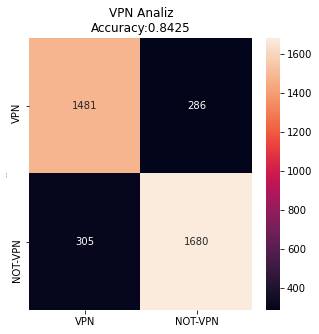

In [18]:
plot_confusion_matrix(y_test, y_pred.round(), "VPN Analiz")

In [19]:
clf = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=0,verbose=1)
clf.fit(X_train,y_train)
rf_preds = clf.predict(X_test)
print(clf.feature_importances_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


[0.0489163  0.06299861 0.1173156  0.04590017 0.03479003 0.06239902
 0.0674771  0.03725958 0.04281186 0.07102307 0.07363042 0.07824337
 0.0748964  0.0589801  0.05917141 0.00835222 0.00851719 0.00847846
 0.00242522 0.0115265  0.01113968 0.01094367 0.00280399]


In [20]:
print("Accuracy: {:<0.4f}".format(accuracy_score(y_test,rf_preds.round())))

Accuracy: 0.8905


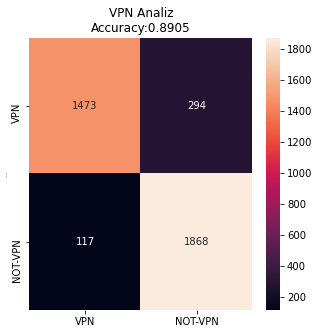

In [21]:
plot_confusion_matrix(y_test,rf_preds.round(), "VPN Analiz")

In [22]:
print(classification_report(y_test,rf_preds.round()))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1767
           1       0.86      0.94      0.90      1985

    accuracy                           0.89      3752
   macro avg       0.90      0.89      0.89      3752
weighted avg       0.89      0.89      0.89      3752



In [23]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Features"] = df.drop(columns = ["class1"]).columns
feature_importance_df["Importance"] = clf.feature_importances_

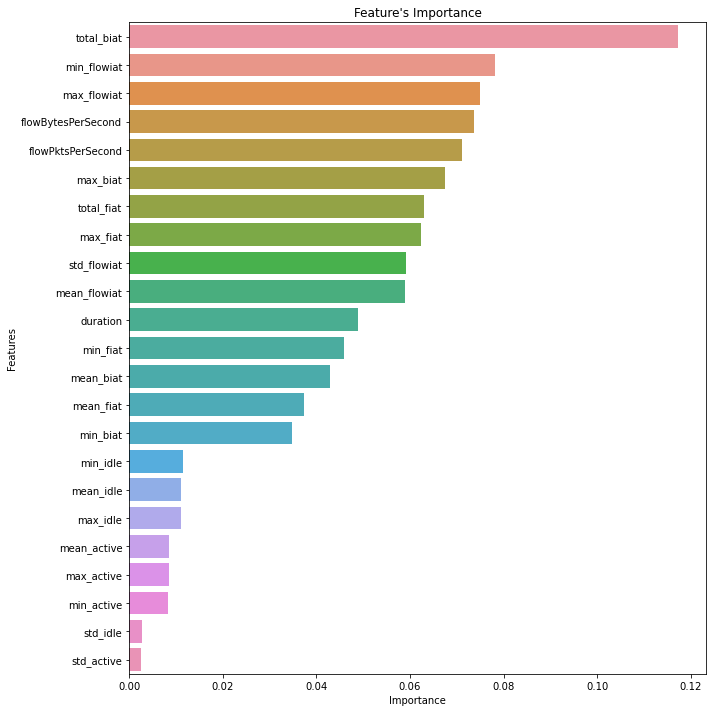

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Features", data=feature_importance_df.sort_values(by="Importance",ascending=False))
plt.title("Feature's Importance")
plt.tight_layout()

In [25]:
#End